In [1]:
from qiskit import QuantumCircuit
from crsq.slater import ARegister, ARegisterFrame
from crsq.slater import BRegister, BRegisterFrame

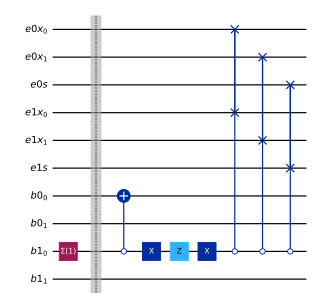

In [2]:

n=2
N=2
m=2
d=1

areg = ARegister(m, N, d)
breg = BRegister(n, N, d)
breg.set_use_custom_gates(True)
breg.set_areg(areg)

breg.allocate_registers()
breg_frame = breg.frame
qc = breg_frame.circuit

breg.build_sums(breg_frame)

qc.barrier()
breg.build_permutations(breg_frame)
qc.draw(scale=0.6)


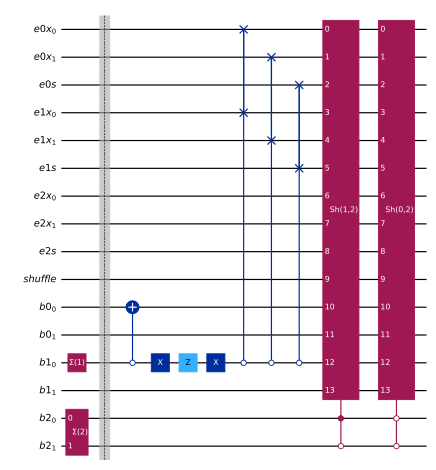

In [3]:
n=2
N=3
d=1
m=2
areg = ARegister(m, N, d)
breg = BRegister(n, N, d)
breg.set_use_custom_gates(True)
breg.set_areg(areg)

breg.allocate_registers()
breg_frame = breg.frame
qc = breg_frame.circuit

breg.build_sums(breg_frame)
qc.barrier()
breg.build_permutations(breg_frame)
qc.draw(scale=0.6)


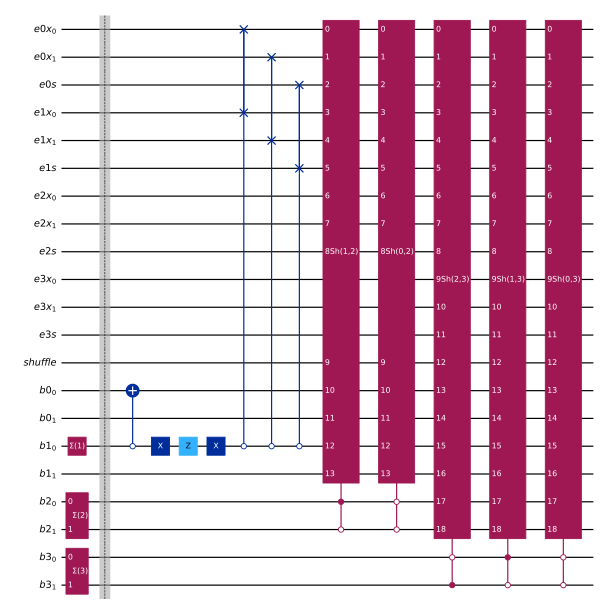

In [4]:
n=2
N=4
m=2
d=1

areg = ARegister(m, N, d)
breg = BRegister(n, N, d)
breg.set_use_custom_gates(True)
breg.set_areg(areg)

breg.allocate_registers()
breg_frame = breg.frame
qc = breg_frame.circuit

breg.build_sums(breg_frame)
qc.barrier()
breg.build_permutations(breg_frame)
qc.draw(scale=0.6)


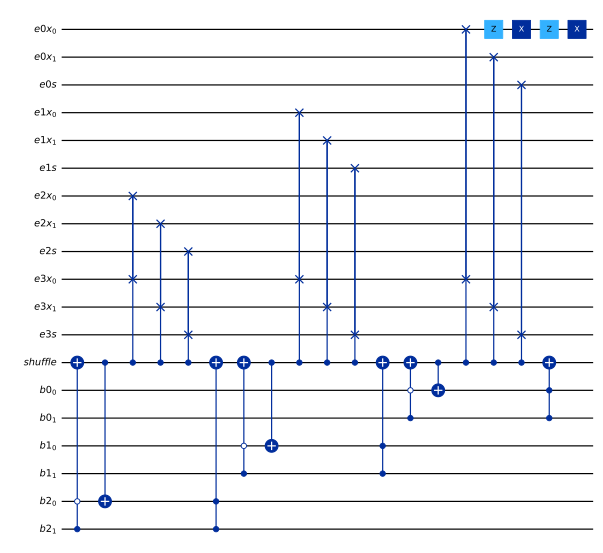

In [5]:
n=2
N=4
m=2
d=1
areg = ARegister(m, N, d)
breg = BRegister(n, N, d)
breg.set_areg(areg)

frame = breg._make_frame_to_shuffle_regs(3, 2, "10", 2)
circ = frame.circuit
circ.draw(scale=0.6)

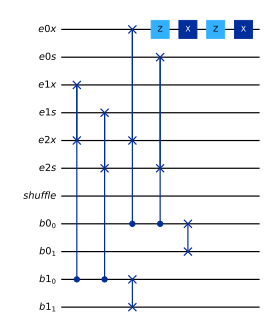

In [6]:
n=2
N=3
m=1
d=1
areg = ARegister(m, N, d)
breg = BRegister(n, N, d)

breg.set_areg(areg)
frame = breg._make_frame_to_shuffle_regs(2, 2, "01", 1)
circ = frame.circuit
circ.draw(scale=0.6)

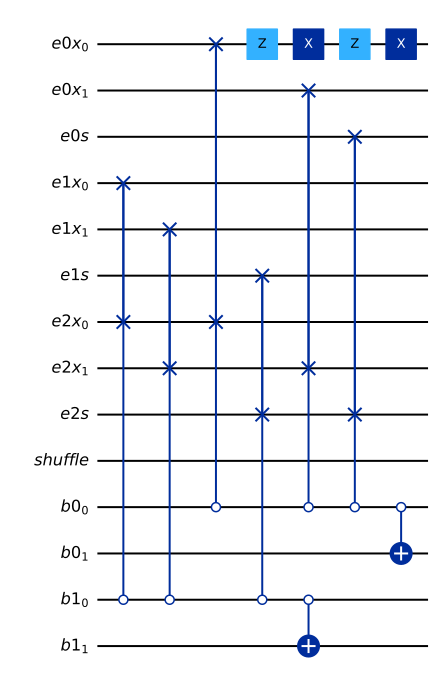

In [7]:
n=2
N=3
m=2
d=1
areg = ARegister(m, N, d)
breg = BRegister(n, N, d)
breg.set_areg(areg)

frame = breg._make_frame_to_shuffle_regs(2, 2, "00", 0)
circ = frame.circuit
circ.draw()

In [8]:
import math
from qiskit import transpile
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram


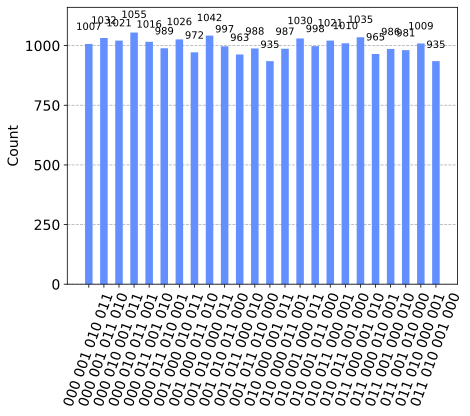

In [9]:
n=3
N=4
d=1
NN = math.factorial(N)
M=1000

breg = BRegister(n, N, 1)
breg.set_use_custom_gates(True)
breg.set_should_swap_aregs(False)
breg.allocate_registers()

frame = breg.frame
qc = frame.circuit
bregs = frame.bregs
cregs = [ClassicalRegister(n) for _ in range(N)]
qc.add_register(*cregs)
breg.build_sums(frame)
qc.barrier()
breg.build_permutations(frame)
for i in range(N):
    qc.measure(bregs[i], cregs[i])
#qc.draw()

backend = Aer.get_backend('aer_simulator_statevector')
result = backend.run(transpile(qc, backend), shots=M*NN).result()
counts = result.get_counts(qc)

dist = {}
for k in counts.keys():
    value = counts[k]
    bucket = (value//10)*10
    bucket_name= f"{bucket:04}-{bucket+9:04}"
    if bucket_name in dist:
        dist[bucket_name] += 1
    else:
        dist[bucket_name] = 1

#plot_histogram(dist)
plot_histogram(counts)

 b3, b2, b1, b0,shuffle,amplitude
000,001,010,011,      0, 0.204124
000,001,011,010,      0, 0.204124
000,010,001,011,      0, 0.204124
000,010,011,001,      0, 0.204124
000,011,001,010,      0, 0.204124
000,011,010,001,      0, 0.204124
001,000,010,011,      0, 0.204124
001,000,011,010,      0, 0.204124
001,010,000,011,      0, 0.204124
001,010,011,000,      0, 0.204124
001,011,000,010,      0, 0.204124
001,011,010,000,      0, 0.204124
010,000,001,011,      0, 0.204124
010,000,011,001,      0, 0.204124
010,001,000,011,      0, 0.204124
010,001,011,000,      0, 0.204124
010,011,000,001,      0, 0.204124
010,011,001,000,      0, 0.204124
011,000,001,010,      0, 0.204124
011,000,010,001,      0, 0.204124
011,001,000,010,      0, 0.204124
011,001,010,000,      0, 0.204124
011,010,000,001,      0, 0.204124
011,010,001,000,      0, 0.204124


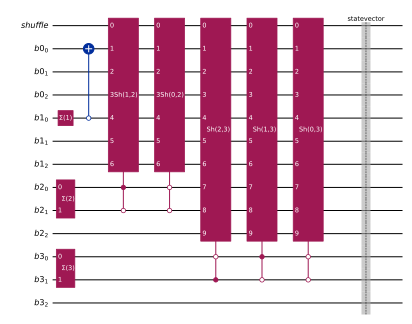

In [10]:
import crsq.utils.statevector as svec
n=3
N=4
d=1
NN = math.factorial(N)
M=1000

breg = BRegister(n, N, 1)
breg.set_use_custom_gates(True)
breg.set_should_swap_aregs(False)
breg.allocate_registers()

breg_frame = breg.frame
qc = breg_frame.circuit

breg.build_sums(breg_frame)
#qc.barrier()
breg.build_permutations(breg_frame)
qc.save_statevector()

backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc, backend), shots=M*NN).result()
sv = result.get_statevector()

svec.dump_statevector(sv, qc, eps=1.0e-6)

qc.draw(scale=0.5)


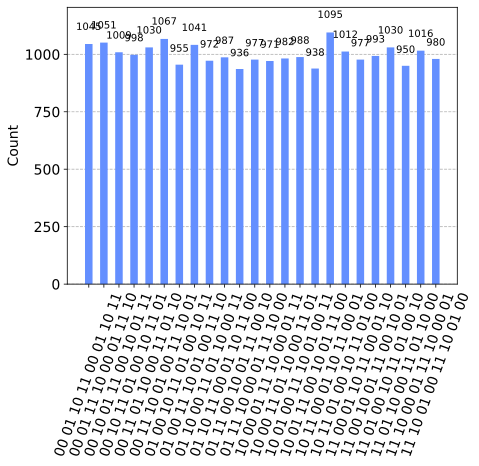

In [11]:
n=2
N=4
m=2
d=1
NN = math.factorial(N)
M=1000

m=2
breg = BRegister(n, N, d)
breg.set_use_custom_gates(True)
areg = ARegister(m, N, d)
breg.set_areg(areg)
breg.allocate_registers()

breg_frame = breg.frame
areg_frame = breg_frame.areg_frame
qc = breg_frame.circuit

aregs = breg_frame.areg_frame.aregs
bregs = breg_frame.bregs
cregs = [ClassicalRegister(n) for _ in range(N*2)]
qc.add_register(*cregs)

areg.set_test_values(areg_frame)

breg.build_sums(breg_frame)
qc.barrier()
breg.build_permutations(breg_frame)
qc.save_statevector()
for i in range(N):
    qc.measure(aregs[i][0], cregs[i])
for i in range(N):
    # skip ancilla
    qc.measure(bregs[i], cregs[N+i])
#qc.draw()

backend = AerSimulator(method='statevector')
result = backend.run(transpile(qc, backend), shots=M*NN).result()
sv = result.get_statevector()
counts = result.get_counts()

dist = {}
for k in counts.keys():
    value = counts[k]
    bucket = (value//10)*10
    bucket_name= f"{bucket:04}-{bucket+9:04}"
    if bucket_name in dist:
        dist[bucket_name] += 1
    else:
        dist[bucket_name] = 1

#plot_histogram(dist)
plot_histogram(counts)

In [12]:
import math
import cmath
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram

from crsq.slater import ARegister, ARegisterFrame
from crsq.slater import BRegister, BRegisterFrame
import crsq.utils.amplitudes as amplitudes
import crsq.utils.statevector as svec
import crsq.utils.setdistribution as setdist

In [13]:
n=2
N=3
m=2
d=1

M=1

NN = math.factorial(N)

breg = BRegister(n, N, d)
breg.set_use_custom_gates(True)
areg = ARegister(m, N, d)
breg.set_areg(areg)
breg.allocate_registers()

breg_frame = breg.frame
areg_frame = breg_frame.areg_frame
qc = breg_frame.circuit

areg.set_test_values(areg_frame)

breg.build_sums(breg_frame)
breg.build_permutations(breg_frame)
qc.save_statevector()

backend = AerSimulator(method='matrix_product_state')
result = backend.run(transpile(qc, backend), shots=1).result()
sv = result.get_statevector()

eps=1e-6
ieps=1e+6

gphase = 0
gphase = -math.pi*5/8
gp = cmath.exp(gphase*1j)

svec.save_to_file("statevector.csv", sv, 1e-10)

d = int(math.log2(sv.dim))
Md=1<<d
for k, z in enumerate(sv.data):
    r = abs(z)
    if r > eps:
        z = z*gp
        key = bin(Md + k)[-d:]
        amp = amplitudes.format_in_polar(z)
        nums = []
        for j in range(N):
            i = int(key[j*2:j*2+2],base=2)
            nums.append(str(i))
        vec= "[" + ",".join(nums) + "]"
        print(f"{key} : {vec} {amp} z={z:.6f} |z|={r:.6f}")

svec.dump_statevector(sv, qc, eps=1e-6, global_phase=gphase)

0001100000101010 : [0,1,2] 0.408248*exp(1.178097j) z=0.156230+0.377172j |z|=0.408248
0010010000010101 : [0,2,1] 0.408248*exp(-1.963495j) z=-0.156230-0.377172j |z|=0.408248
0100100101000010 : [1,0,2] 0.408248*exp(-1.963495j) z=-0.156230-0.377172j |z|=0.408248
0110000101010000 : [1,2,0] 0.408248*exp(1.178097j) z=0.156230+0.377172j |z|=0.408248
1000010010000101 : [2,0,1] 0.408248*exp(1.178097j) z=0.156230+0.377172j |z|=0.408248
1001000010101000 : [2,1,0] 0.408248*exp(-1.963495j) z=-0.156230-0.377172j |z|=0.408248
b2,b1,b0,shuffle,e2s,e2x,e1s,e1x,e0s,e0x,amplitude
00,01,10,      0,  0, 00,  1, 01,  0, 10, 0.408248*exp(1.178097j)
00,10,01,      0,  0, 00,  0, 10,  1, 01, 0.408248*exp(-1.963495j)
01,00,10,      0,  1, 01,  0, 00,  0, 10, 0.408248*exp(-1.963495j)
01,10,00,      0,  1, 01,  0, 10,  0, 00, 0.408248*exp(1.178097j)
10,00,01,      0,  0, 10,  0, 00,  1, 01, 0.408248*exp(1.178097j)
10,01,00,      0,  0, 10,  1, 01,  0, 00, 0.408248*exp(-1.963495j)


In [14]:
import numpy as np
import math, cmath

def set_test_trig_values(areg: ARegister, frame: ARegisterFrame):
    qc = frame.circuit
    N = 2 ** areg.num_electron_index_bits
    values = np.zeros(N)
    for i in range(areg.num_particles):
        for d in range(areg.dimension):
            amp = math.cos(d*math.pi/2)
            k = 2*math.pi/N*i
            for x in range(N):
                values[x] = amp*math.cos(k*x)
            setdist.setdist(qc, frame.aregs[i][d], values)

n=2
N=3
m=2
d=1

M=1

NN = math.factorial(N)

breg = BRegister(n, N, d)
breg.set_use_custom_gates(True)
areg = ARegister(m, N, d)
breg.set_areg(areg)
breg.allocate_registers()

breg_frame = breg.frame
areg_frame = breg_frame.areg_frame
qc = breg_frame.circuit

set_test_trig_values(areg, areg_frame)

breg.build_sums(breg_frame)
breg.build_permutations(breg_frame)
qc.save_statevector()

backend = AerSimulator(method='matrix_product_state')
result = backend.run(transpile(qc, backend), shots=1).result()
sv = result.get_statevector()


In [15]:
for k, z in enumerate(sv.data):
    r = abs(z)
    if r < eps:
        continue
    m = svec.decode_state_key(qc, k)

In [16]:
from tests.test_tools import run_circuit_and_check
from qiskit.quantum_info import Statevector

In [17]:

# 回路を作る
qc = QuantumCircuit(3)
th = 2*math.acos(math.sqrt(2/3))
qc.ry(th, 1)
qc.ch(1,0, ctrl_state=0)
qc.save_statevector()


aersim = AerSimulator(method='matrix_product_state')
qctr = transpile(qc, aersim)
result = aersim.run(qctr, shots=1).result()
sv: Statevector = result.get_statevector()
result_dict = sv.to_dict()

print(result_dict)


# backend = Aer.get_backend('aer_simulator')
# result = backend.run(transpile(qc, backend), shots=1).result()
#data = result.data(0)
#sv: Statevector = data['s1']
# s2 = data['s2']

p = math.sqrt(1/3)
expected = {
    "000": p,
    "001": p,
    "010": p
}
sv.draw('latex')

{'000': (0.5773502691896261-5.551115123125786e-17j), '001': (0.577350269189626-1.1398966643274228e-17j), '010': (0.577350269189626+0j), '011': (-5.551115123125783e-17+2.7262829393383156e-17j)}


<IPython.core.display.Latex object>

[[1.0, 0.8535533905932737, 0.5, 0.14644660940672627, 0.0, 0.14644660940672616, 0.4999999999999999, 0.8535533905932737]]
[[1.0, 0.5, 0.0, 0.4999999999999999, 1.0, 0.5000000000000001, 0.0, 0.4999999999999998]]
[[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]]
reg  e0x  start_pos:  0
reg  e1x  start_pos:  3
reg  e2x  start_pos:  6
reg  ab2  start_pos:  9
reg  ab3  start_pos:  10
reg  shuffle  start_pos:  12
group reg:  ab2
group reg:  ab3
wave_function_reg:  e0x
wave_function_reg:  e1x
wave_function_reg:  e2x
(8,)


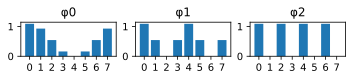

In [18]:
import math

import numpy as np
import matplotlib.pyplot as plt

from qiskit_aer import AerSimulator
from qiskit import transpile
import crsq.utils.statevector as statevector

from crsq.blocks.wave_function import WaveFunctionRegisterSpec, make_test_elec_orbitals
from crsq.blocks.antisymmetrization import AntisymmetrizationSpec
from crsq.blocks.energy_initialization import EnergyConfigurationSpec, SlaterDeterminantPreparationBlock, GeneralStatePreparationBlock

#
# preparation of the initial orbital data

num_electrons=3
num_coord_bits=3
L=2
wfr_spec = WaveFunctionRegisterSpec(1, num_coord_bits, L, num_electrons, 0, 0)
asy_spec = AntisymmetrizationSpec(wfr_spec, 3)

orbital_data = make_test_elec_orbitals(wfr_spec, 1)

for i in range(num_electrons):
    print(orbital_data[0][i])

#
# Set the initial orbital data and get a plot.
#

ene_spec = EnergyConfigurationSpec([1], orbital_data, [[]])
sd_block = SlaterDeterminantPreparationBlock(ene_spec, asy_spec, 0)
# single_block.circuit.draw(scale=0.6)

bg = GeneralStatePreparationBlock(ene_spec, asy_spec, build=False)
bg.invoke(sd_block.bind(eregs=bg._eregs, nregs=bg._nregs, bregs=bg._sigma_regs, shuffle=bg._shuffle_ancilla))
bg.circuit.save_statevector()
# bg.circuit.draw(scale=0.6)

backend = AerSimulator()
transpiled = transpile(bg.circuit, backend)

result = backend.run(transpiled, shots=1).result()

sv = result.get_statevector()
data_map = statevector.extract_wave_functions(bg.circuit, bg._sigma_regs, bg._eregs, sv, eps=1e-20)

num_rows = 1
fig, axes = plt.subplots(num_rows, num_electrons, figsize=(num_electrons*1.6,num_rows*1.0), layout="constrained")

# no permutation
keys = ["1 10"]
# with permutation
# keys = ["0 00"]

values=data_map[keys[0]][0]

shape=values.shape
print(shape)
names= [ str(k) for k in range(shape[0])]
row = 0
for col in range(num_electrons):
    ax = axes[col]
    ax.bar(names, data_map[keys[row]][col])
    ax.set_title(f"φ{col}")

fig.savefig(f"paper_diagrams/antisym.input.e{num_electrons}.png")

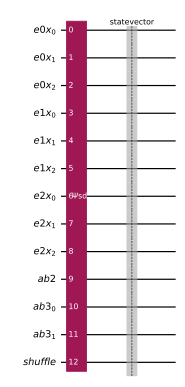

In [19]:
eiblock = GeneralStatePreparationBlock(ene_spec, asy_spec)
eiblock.circuit.save_statevector()

eiblock.circuit.draw(scale=0.6)



In [20]:

backend = AerSimulator()
transpiled = transpile(eiblock.circuit, backend)

result = backend.run(transpiled, shots=1).result()

sv = result.get_statevector()
data_map = statevector.extract_wave_functions(eiblock.circuit, eiblock._sigma_regs, eiblock._eregs, sv, eps=1e-16)

reg  e0x  start_pos:  0
reg  e1x  start_pos:  3
reg  e2x  start_pos:  6
reg  ab2  start_pos:  9
reg  ab3  start_pos:  10
reg  shuffle  start_pos:  12
group reg:  ab2
group reg:  ab3
wave_function_reg:  e0x
wave_function_reg:  e1x
wave_function_reg:  e2x


(8,)


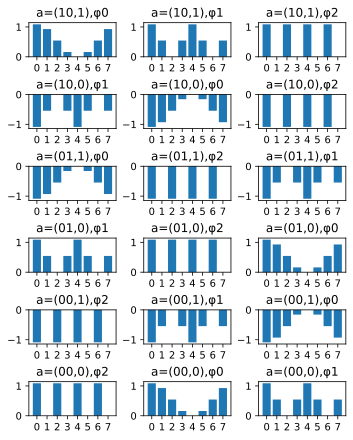

In [21]:
import matplotlib.pyplot as plt

keys = []

if num_electrons == 4:
    if asy_spec.method == 2:
        for i in ["1000","0100","0010","0001"]:
            for j in ["100","010","001"]:
                for k in ["1","0"]:
                    keys.append(k + " " + j + " " + i)
    elif asy_spec.method == 3:
        for i in ["11","10","01","00"]:
            for j in ["10","01","00"]:
                for k in ["1","0"]:
                    keys.append(k + " " + j + " " + i)

if num_electrons == 3:
    if asy_spec.method == 2:
        keys = ["1 100", "0 100", "1 010", "0 010", "1 001", "0 001"]
    elif asy_spec.method == 3:
        keys = ["1 10", "0 10", "1 01", "0 01", "1 00", "0 00"]

if num_electrons == 2:
    keys = ["1","0"]


def sigma_b2(k1,k2):
    n1 = int(k1, 2)
    n2 = int(k2, 2)
    seq = [0,1,2]
    if n1 != 1:
        t = seq[n1]
        seq[n1] = seq[1]
        seq[1] = t
    if n2 != 2:
        t = seq[n2]
        seq[n2] = seq[2]
        seq[2] = t
    return seq

values=data_map[keys[0]][0]

shape=values.shape
print(shape)
names= [ str(k) for k in range(shape[0])]

num_rows = math.factorial(num_electrons)

fig, axes = plt.subplots(num_rows, num_electrons, figsize=(num_electrons*1.6,num_rows*1.0), dpi=300, layout="constrained")

for row in range(num_rows):
    k1,k2 = keys[row].split(" ")
    seq = sigma_b2(k1,k2)
    for col in range(num_electrons):
        ax = axes[row][col]
        ax.bar(names, data_map[keys[row]][col])
        ind = seq[col]
        ax.set_title(f"a=({k2},{k1}),φ{ind}")

fig.savefig(f"paper_diagrams/antisym.method{asy_spec.method}.elec{num_electrons}.png")

In [22]:
if num_electrons == 3:
    if asy_spec.method == 2:
        print(data_map['1 100'][0])
    else:
        print(data_map['1 10'][0])

[ 1.08866211e+00  9.29231233e-01  5.44331054e-01  1.59430874e-01
 -6.66613283e-17  1.59430874e-01  5.44331054e-01  9.29231233e-01]
